<a href="https://colab.research.google.com/github/abhaswanchu1/mids-281-final-project-cars/blob/Abhas-Work/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Random Forest with PCA Feature Set

In [ ]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
##############################################################################################
########################  Load Images  ########################################################
##############################################################################################
# Load the train and test data
X_train_pca = np.load(r"drive/MyDrive/X.npy")
X_test_pca = np.load(r"drive/MyDrive/X_test.npy")
Y_train = np.load(r"drive/MyDrive/targets.npy")
Y_test = np.load(r"drive/MyDrive/test_targets.npy")
X_train = np.load(r'drive/MyDrive/stacked_features.npy')
X_test = np.load(r'drive/MyDrive/stacked_features_test.npy')


In [ ]:
#time the training
import time
# Create a Random Forest classifier with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
# Train the model on the training data
rf_model.fit(X_train_pca, Y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 33.827791929244995 seconds


Accuracy (Training Data): 1.0
Precision (Training Data): 1.0
Recall (Training Data): 1.0
Weighted F1-score (Training Data): 1.0


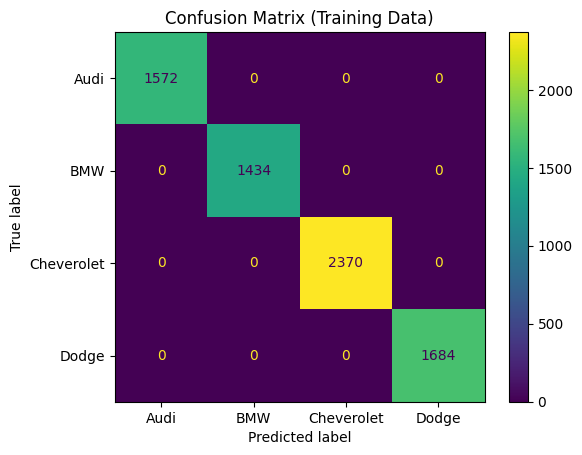

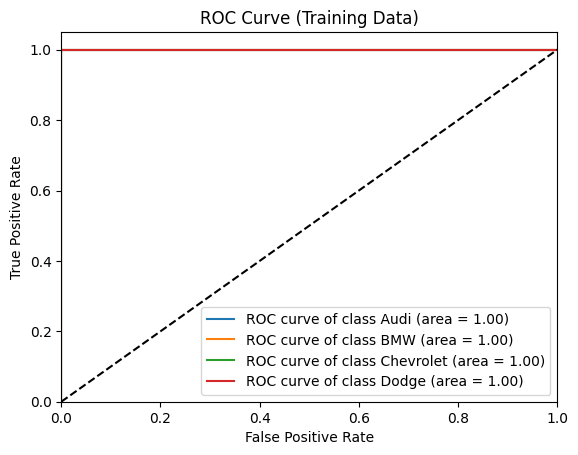

In [ ]:
# Make predictions on the training data
Y_pred_train = rf_model.predict(X_train_pca)

# Calculate accuracy
accuracy = accuracy_score(Y_train, Y_pred_train)
print(f"Accuracy (Training Data): {accuracy}")

# Calculate precision, recall, and F1-score
precision = precision_score(Y_train, Y_pred_train, average='weighted')
recall = recall_score(Y_train, Y_pred_train, average='weighted')
f1 = f1_score(Y_train, Y_pred_train, average='weighted')

print(f"Precision (Training Data): {precision}")
print(f"Recall (Training Data): {recall}")
print(f"Weighted F1-score (Training Data): {f1}")
class_names = ['Audi', 'BMW', 'Cheverolet', 'Dodge']
# Visualize the confusion matrix
cm_train = confusion_matrix(Y_train, Y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels = class_names)
disp_train.plot()
plt.title("Confusion Matrix (Training Data)")
plt.show()

# Plot the AUC ROC curve
Y_train_bin = label_binarize(Y_train, classes=np.unique(Y_train))
Y_pred_train_bin = label_binarize(Y_pred_train, classes=np.unique(Y_train))
n_classes = Y_train_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_train_bin[:, i], Y_pred_train_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(np.unique(Y_test)[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Data)')
plt.legend(loc="lower right")
plt.show()

Accuracy (Test Data): 0.3724388631857237
Precision (Test Data): 0.46284924566591606
Recall (Test Data): 0.3724388631857237
Weighted F1-score (Test Data): 0.2548346736295525


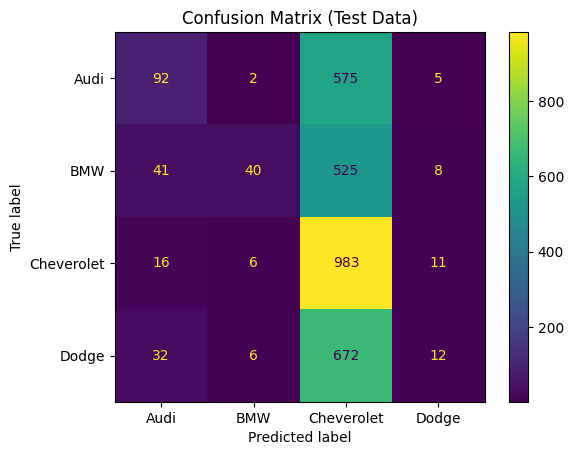

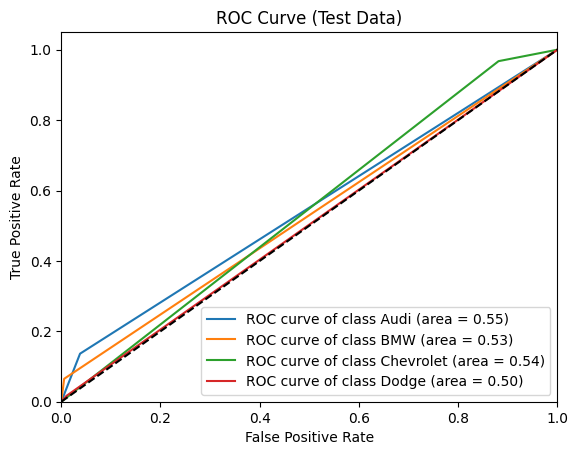

In [ ]:
# Make predictions on the test data
Y_pred_test = rf_model.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred_test)
print(f"Accuracy (Test Data): {accuracy}")

# Calculate precision, recall, and F1-score
precision = precision_score(Y_test, Y_pred_test, average='weighted')
recall = recall_score(Y_test, Y_pred_test, average='weighted')
f1 = f1_score(Y_test, Y_pred_test, average='weighted')

print(f"Precision (Test Data): {precision}")
print(f"Recall (Test Data): {recall}")
print(f"Weighted F1-score (Test Data): {f1}")

# Visualize the confusion matrix
cm_test = confusion_matrix(Y_test, Y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,display_labels = class_names)
disp_test.plot()
plt.title("Confusion Matrix (Test Data)")
plt.show()

# Plot the AUC ROC curve
Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
Y_pred_test_bin = label_binarize(Y_pred_test, classes=np.unique(Y_test))
n_classes = Y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_pred_test_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(np.unique(Y_test)[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Data)')
plt.legend(loc="lower right")
plt.show()

##Random Forest with Full Feature Set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create and train the Random Forest model with full features
rf_model_full = RandomForestClassifier(n_estimators=100, random_state=42)
start_time = time.time()
rf_model_full.fit(X_train, Y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

Training time: 125.19416737556458 seconds


Accuracy (Training Data - Full Features): 1.0
Precision (Training Data - Full Features): 1.0
Recall (Training Data - Full Features): 1.0
Weighted F1-score (Training Data - Full Features): 1.0


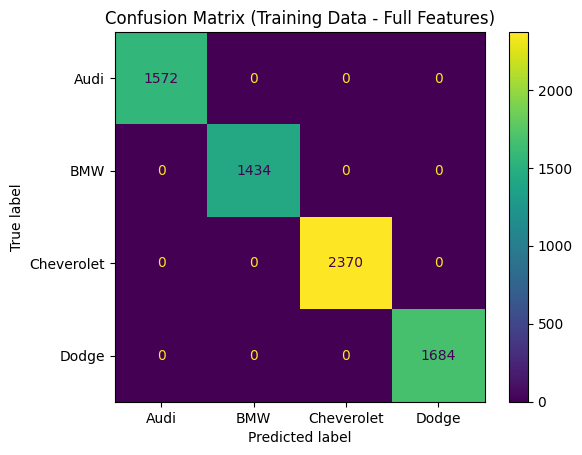

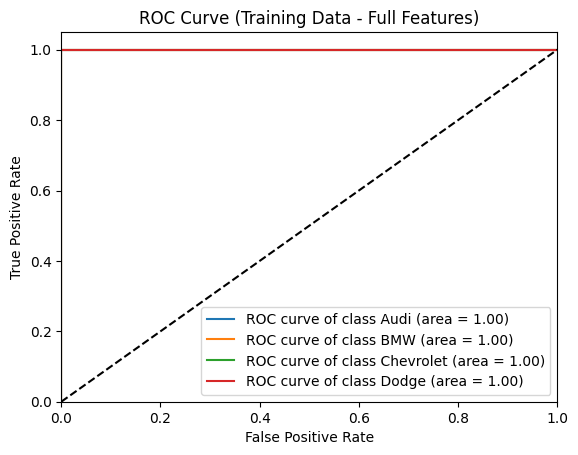

In [ ]:
# Make predictions on the training data
Y_pred_train_full = rf_model_full.predict(X_train)

# Calculate accuracy
accuracy = accuracy_score(Y_train, Y_pred_train_full)
print(f"Accuracy (Training Data - Full Features): {accuracy}")

# Calculate precision, recall, and F1-score
precision = precision_score(Y_train, Y_pred_train_full, average='weighted')
recall = recall_score(Y_train, Y_pred_train_full, average='weighted')
f1 = f1_score(Y_train, Y_pred_train_full, average='weighted')

print(f"Precision (Training Data - Full Features): {precision}")
print(f"Recall (Training Data - Full Features): {recall}")
print(f"Weighted F1-score (Training Data - Full Features): {f1}")

# Visualize the confusion matrix
cm_train_full = confusion_matrix(Y_train, Y_pred_train_full)
disp_train_full = ConfusionMatrixDisplay(confusion_matrix=cm_train_full,display_labels = class_names)
disp_train_full.plot()
plt.title("Confusion Matrix (Training Data - Full Features)")
plt.show()

# Plot the AUC ROC curve
Y_train_bin = label_binarize(Y_train, classes=np.unique(Y_train))
Y_pred_train_bin_full = label_binarize(Y_pred_train_full, classes=np.unique(Y_train))
n_classes = Y_train_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_train_bin[:, i], Y_pred_train_bin_full[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(np.unique(Y_test)[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Data - Full Features)')
plt.legend(loc="lower right")
plt.show()

Accuracy (Test Data - Full Features): 0.38664904163912756
Precision (Test Data - Full Features): 0.37260493974675346
Recall (Test Data - Full Features): 0.38664904163912756
Weighted F1-score (Test Data - Full Features): 0.34879656179910473


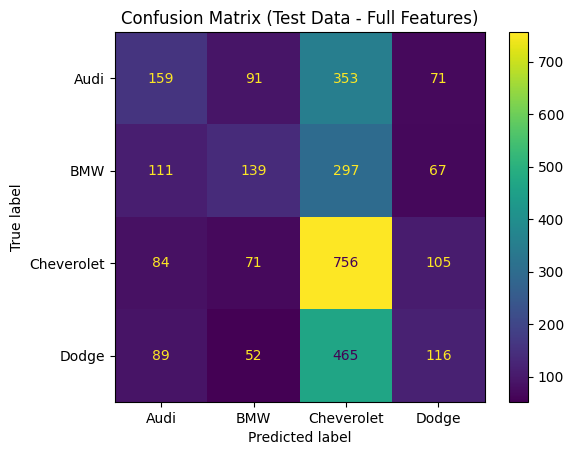

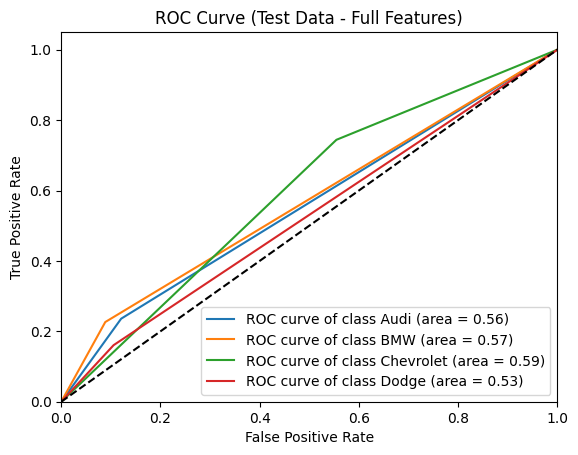

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming rf_model_full is already trained on X_train and Y_train

# Make predictions on the test data
Y_pred_test_full = rf_model_full.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred_test_full)
print(f"Accuracy (Test Data - Full Features): {accuracy}")

# Calculate precision, recall, and F1-score
precision = precision_score(Y_test, Y_pred_test_full, average='weighted')
recall = recall_score(Y_test, Y_pred_test_full, average='weighted')
f1 = f1_score(Y_test, Y_pred_test_full, average='weighted')

print(f"Precision (Test Data - Full Features): {precision}")
print(f"Recall (Test Data - Full Features): {recall}")
print(f"Weighted F1-score (Test Data - Full Features): {f1}")

# Visualize the confusion matrix
cm_test_full = confusion_matrix(Y_test, Y_pred_test_full)
disp_test_full = ConfusionMatrixDisplay(confusion_matrix=cm_test_full,display_labels = class_names)
disp_test_full.plot()
plt.title("Confusion Matrix (Test Data - Full Features)")
plt.show()

# Plot the AUC ROC curve
Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
Y_pred_test_bin_full = label_binarize(Y_pred_test_full, classes=np.unique(Y_test))
n_classes = Y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_pred_test_bin_full[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(np.unique(Y_test)[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Data - Full Features)')
plt.legend(loc="lower right")
plt.show()